<a href="https://colab.research.google.com/github/chominyeong/PyTorch-DeepLearning-Start/blob/main/Ch05_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) 원핫 인코딩
* 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법
* 만약 클래스 표기를 1,2,3,4 식으로 한다면 수의 크기에 따라 가중치가 부여될 수 있음. ex) loss function을 통한 계산

### 3) 소프트맥스 회귀의 비용 함수 구현하기

파이토치로 소프트맥스의 비용 함수 구하기(로우-레벨)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

In [3]:
z = torch.FloatTensor([1, 2, 3])  # 소프트맥스 함수의 입력

In [4]:
print(z)

tensor([1., 2., 3.])


In [5]:
hypothesis = F.softmax(z)
print(hypothesis)   # 0과 1 사이의 값

tensor([0.0900, 0.2447, 0.6652])


<ipython-input-5-7082db8cb160>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  hypothesis = F.softmax(z)


In [6]:
hypothesis.sum()   # 합은 1

tensor(1.)

In [7]:
z = torch.rand(3,5, requires_grad=True)   # 소프트맥스 함수의 입력 (3 x 5 행렬)
print(z)

tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293],
        [0.7999, 0.3971, 0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826, 0.3051, 0.4635]], requires_grad=True)


In [8]:
# 3개의 샘플, 5개의 feature → 3개의 클래스에 대해 예측
hypothesis = F.softmax(z, dim=1)     # dim=1 : 각 샘플에 대해 소프트맥스 함수 적용
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)


In [11]:
print(hypothesis[0].sum(),
      hypothesis[1].sum(),
      hypothesis[2].sum())   # 각 행의 합은 1

tensor(1.0000, grad_fn=<SumBackward0>) tensor(1., grad_fn=<SumBackward0>) tensor(1., grad_fn=<SumBackward0>)


실제값에 대해 원-핫 인코딩

In [12]:
y = torch.randint(5,(3,)).long()  # 각 샘플에 대해 임의의 레이블 생성
print(y)

tensor([0, 2, 1])


In [14]:
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [17]:
y    # (3,)

tensor([0, 2, 1])

In [18]:
y.unsqueeze(1)   # (3 x 1)

tensor([[0],
        [2],
        [1]])

In [20]:
# scatter의 첫 번째 원소 : dim=1에 대해 수행
# scatter의 세 번째 원소 : y.unsqueeze(1)이 알려주는 위치에 1 추가
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [21]:
print(y_one_hot)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


In [22]:
# 비용함수!!
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

In [23]:
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


파이토치로 소프트맥스의 비용 함수 구하기(하이 레벨)

In [24]:
# 소프트맥스 함수의 출력값을 로그함수에 넣어 비용 함수를 구했다.
torch.log(F.softmax(z, dim=1))

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward0>)

In [25]:
# 파이토치에서는 두 개의 함수를 결합한 F.log_softmax() 함수를 제공한다.
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [27]:
# 이렇게 해서 비용 함수를 구했다.
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [28]:
# 더 간단하게 구해보자.
F.nll_loss(F.log_softmax(z, dim=1),y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [29]:
## 더더 간단하게 구해보자.
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [ ]:
z

In [30]:
F.softmax(z, dim=1)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>)

In [31]:
F.softmax(z, dim=1).sum(dim=1)

tensor([1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)

In [32]:
F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]],
       grad_fn=<LogSoftmaxBackward0>)

In [33]:
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [34]:
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

In [35]:
F.cross_entropy(z, y)

tensor(1.4689, grad_fn=<NllLossBackward0>)

### 4) 소프트맥스 회귀 구현하기

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [37]:
torch.manual_seed(1)

In [38]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [40]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [41]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [54]:
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

F.softmax()와 torch.log() 사용

In [55]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1)

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


F.cross_entropy() 사용

In [56]:
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=0.1)
num_epochs = 1000
for epoch in range(num_epochs + 1):
  z = x_train.matmul(W) + b
  loss_func = F.cross_entropy(z, y_train)

  optimizer.zero_grad()
  loss_func.backward()
  optimizer.step()

  if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, num_epochs, loss_func.item()
      ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


nn.Linear()를 이용하기

In [57]:
model = nn.Linear(4, 3)
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


소프트맥스 회귀 클래스로 구현하기

In [58]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3)

  def forward(self, x):
    return self.linear(x)

In [59]:
model = SoftmaxClassifierModel()

In [60]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))


Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428280
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


### 5) 소프트맥스 회귀로 MNIST 데이터 분류하기

In [62]:
import torch
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [63]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)
device = torch.device("cuda" if USE_CUDA else "cpu")
print("다음 기기로 학습합니다:", device)

True
다음 기기로 학습합니다: cuda


In [64]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [65]:
training_epochs = 15
batch_size = 100

In [67]:
mnist_train = dsets.MNIST(
    root='/content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/', # 다운로드 받을 경로
    train=True, # 학습 이미지를 다운
    transform=transforms.ToTensor(), #transforms함수를 이용해 텐서화
    download=True # 해당경로에 데이터 없으면 다운로드
)
mnist_test = dsets.MNIST(
    root='/content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/',
    train=False,
    transform=transforms.ToTensor(), #transforms함수를 이용해 텐서화
    download=True # 해당경로에 데이터 없으면 다운로드
)

100%|██████████| 9912422/9912422 [00:00<00:00, 89726393.12it/s]


Extracting /content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 146653382.35it/s]

Extracting /content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 27555657.63it/s]


Extracting /content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2486365.02it/s]


Extracting /content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/PyTorch로 시작하는 딥 러닝 입문/MNIST/raw



In [68]:
data_loader = DataLoader(
    dataset=mnist_train,
    batch_size=batch_size,
    shuffle=True,
    drop_last=True
)

In [69]:
linear = nn.Linear(28*28, 10, bias=True).to(device) #연산을 어디서 할지 정함

In [70]:
loss_func = nn.CrossEntropyLoss().to(device) #F.cross_entropy 도 상관없음
optimizer = optim.SGD(linear.parameters(), lr=0.1)

In [71]:
for epoch in range(training_epochs):
  avg_loss = 0
  total_batch = len(data_loader)

  for x, y in data_loader:
    X = x.view(-1, 28*28).to(device)
    Y = y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    loss = loss_func(hypothesis, Y)

    loss.backward()
    optimizer.step()

    avg_loss += loss / total_batch
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_loss))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Learning finished


Accuracy: 0.883899986743927
Label:  3
Prediction:  3


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:59: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


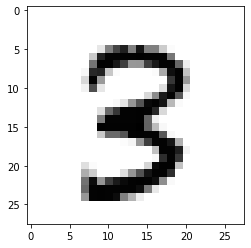

In [ ]:
with torch.no_grad():
  x_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  y_test = mnist_test.test_labels.to(device)

  pred = linear(x_test)
  correct_prediction = torch.argmax(pred, 1) == y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  r = random.randint(0, len(mnist_test) - 1)
  X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()